# **Proyecto 2: Clasificación de Imágenes**

Carmen Lozano López, María Victoria Rodríguez del Corral y María Millán Gordillo.

En esta práctica vamos a implementar una red neuronal que permita clasificar las imágenes del dataset cifar10.

Es un dataset que cuenta con 50.000 imágenes de entrenamiento y 10.000 de test. Las imágenes tienen una estructura de 32x32 píxeles en color (RGB) es decir cuenta con 3 canales.

In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


A continuación, observamos algunas imágenes del conjunto de entrenamiento, normalizamos los datos y pasamos las etiquetas a categorico.

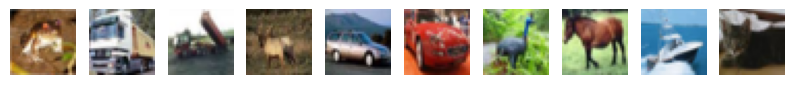

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Display some images
_, ax = plt.subplots(1, 10, figsize=(10,10))
for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

# Image Normalization
# Centered data simplifies learning.
train_samples = (train_images / 255.0) - 0.5
test_samples = (test_images / 255.0) - 0.5

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## **Solo con capas densas**

Vamos a tratar de resolver este problema solo con capas densas.

Para ello necesitamos que las imágenes estén en un vector. Dado que tienen estructura 32x32x3, la dimensión del vector será de 3072.

In [3]:
# Flatten the images.
train_samples1 = train_samples.reshape((-1, 3072))
test_samples1 = test_samples.reshape((-1, 3072))

print("Training dims ", train_samples1.shape)
print("Testing dims ", test_samples1.shape)


Training dims  (50000, 3072)
Testing dims  (10000, 3072)


Planteamos un modelo que cuenta con dos capas ocultas de 128 neuronas y función de activación relu. Junto con la capa de salida con 10 neuronas ya que estamos ante un problema de clasificación de 10 clases distintas y la función de activación de esta última capa es softmax para que nos devuelva la probabilidad de pertenecer a cada clase.



**Configuración**

A continuación vamos a introducir la configuración que vamos a emplear para compilar y entrenar el modelo a lo largo de los distintos experimentos.

Para **compilar** el modelo empleamos el optimizador adam, que permite que el modelo se ajuste de manera más eficiente y efectiva a los datos de entrenamiento. Como función de loss empleamos categorical_crossentropy y para evaluar el modelo vamos a emplear el accuracy.

Finalmente empleamos el método fit para **entrenar** el modelo durante 20 epochs, con un batch_size de 32 y del conjunto de datos de entrenamiento vamos a usar un 20% para validacón.

In [4]:
# Model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model
model = Sequential()
model.add( Dense(128, activation='relu', input_shape=(3072,)) )
model.add( Dense(128, activation='relu') )
model.add( Dense(10, activation='softmax') )

# Display model details
model.summary()

# Model optimization
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_samples1,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.20
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2553 - loss: 2.0676 - val_accuracy: 0.3831 - val_loss: 1.7484
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4096 - loss: 1.6804 - val_accuracy: 0.4262 - val_loss: 1.6436
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4455 - loss: 1.5814 - val_accuracy: 0.4496 - val_loss: 1.5842
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4721 - loss: 1.5122 - val_accuracy: 0.4622 - val_loss: 1.5404
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4918 - loss: 1.4546 - val_accuracy: 0.4698 - val_loss: 1.5071
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5098 - loss: 1.4079 - val_accuracy: 0.4825 - val_loss: 1.4743
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5194 - loss: 1.3688 - val_accuracy: 0.4911 - val_loss: 1.4528
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5303 - loss: 1.3316 - 

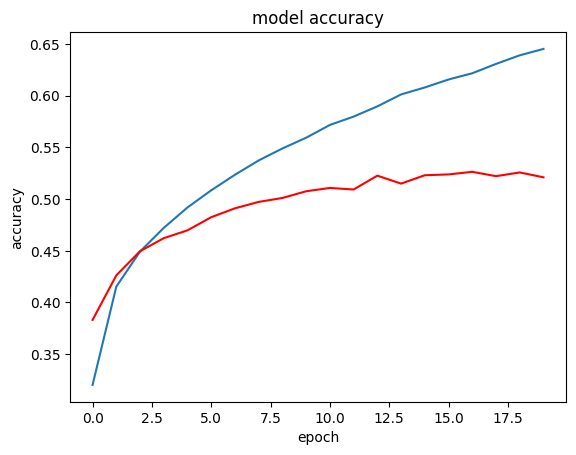

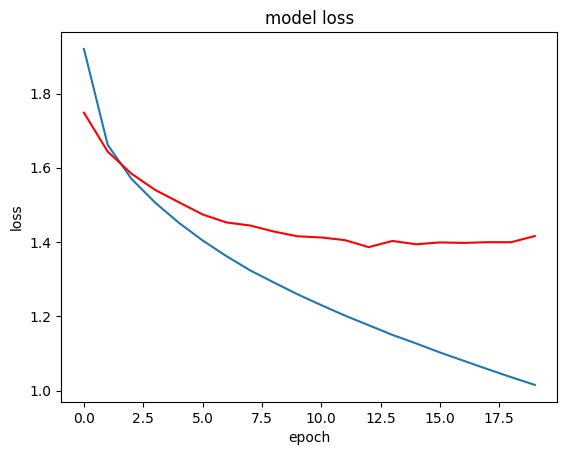

In [ ]:
# Visualization of training results
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Como podemos observar los resultados que obtenemos no son los mejores, en la graáfica de accuracy observamos que mientras que el accuracy del conjunto de entrenamiento sigue creciendo, el del conjunto de validación se ha quedado estancado y está comenzando a disminuir. Lo que nos sugiere que está sobreajustando.

Lo mismo observamos en el gráfico de loss en el que mientras en el conjunto de entrenamiento disminuye, en el conjunto de validación se estanca y comuienza a subir.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


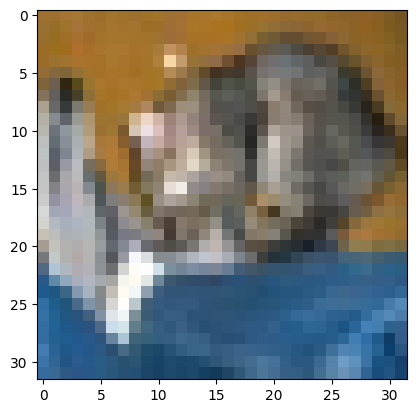

[0.00194885 0.0153842  0.02447607 0.76198614 0.03024107 0.09556204
 0.01387577 0.00078075 0.05354493 0.00220022]


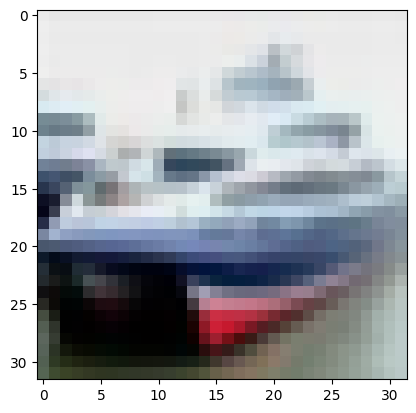

[2.8574321e-02 2.0262782e-01 7.8260119e-04 5.1719701e-04 2.9781429e-04
 7.3248288e-05 2.2504751e-04 2.7562998e-04 5.1455486e-01 2.5207144e-01]


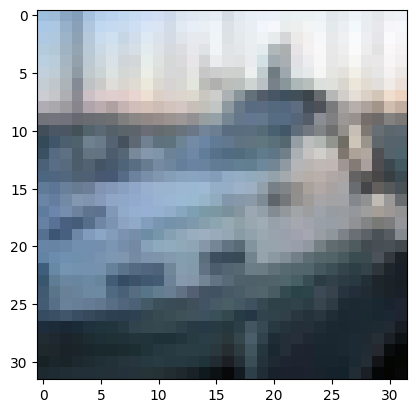

[3.4621853e-01 1.7261210e-01 2.7740938e-03 6.8954373e-04 1.1851308e-03
 1.5972883e-03 4.0159171e-05 2.5576339e-03 1.6465598e-01 3.0766955e-01]


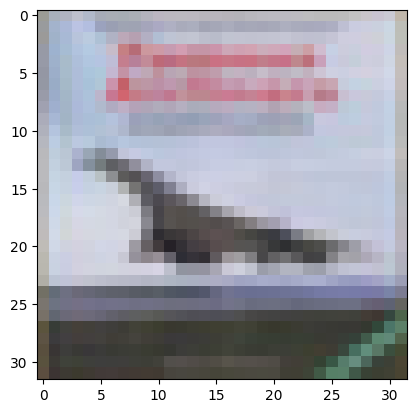

[1.2668146e-01 4.1920473e-03 4.0599787e-01 7.1005481e-03 2.0566005e-01
 6.6462723e-03 2.9254297e-04 1.8339311e-01 5.6615338e-02 3.4207478e-03]


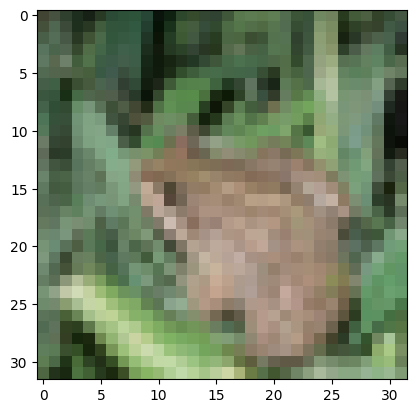

[4.5605074e-04 1.0593400e-04 5.9246834e-02 1.2381209e-02 7.4737525e-01
 6.3701100e-03 1.7012231e-01 1.0268367e-03 2.8979103e-03 1.7656677e-05]


In [8]:
# Visualization of some testing images

# Prediction for the first 10 images of test set
predictions = model.predict(test_samples1[:5])

for i in range(0, 5):
  plt.figure()
  plt.imshow(test_images[i])
  plt.show()
  print( predictions[i] )

In [9]:
model.evaluate(test_samples1, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5208 - loss: 1.3904


[1.3940038681030273, 0.5177000164985657]

Si hacemos una evaluación con el conjunto de datos de test, observamos que obtenemos un 51% de accuracy.

Vamos a tratar de mejorar el modelo empleando capas convolucionales para tener en cuenta la distribución espacial de los datos.

# Capas convolucionales

En este caso no necesitamos que los datos de entrada sean un vector ya que las capas convolucionales aceptan entradas 2D.

Definimos el modelo con dos capas convolucionales una primera con 64 filtros de tamaño 3x3 y activación relu, una segunda con 32 filtros de tamaño 3x3 y activación relu.

A continuación, obtenemos el vector para aplicar dos capas densas de 64 y 32 neuronas respectivamente, ambas con activación relu.

Y finalmente una capa con 10 neuronas y activación softmax para que como explicamos anteriormente nos devuelva la probabilidad de pertenecer a cada clase.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history=model.fit(
    train_samples,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.20
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,628,362 (6.21 MB)

 Trainable params: 1,628,362 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3715 - loss: 1.7369 - val_accuracy: 0.5563 - val_loss: 1.2580
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5799 - loss: 1.1781 - val_accuracy: 0.6073 - val_loss: 1.1285
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6581 - loss: 0.9636 - val_accuracy: 0.6441 - val_loss: 1.0429
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7215 - loss: 0.7959 - val_accuracy: 0.6375 - val_loss: 1.0626
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7701 - loss: 0.6642 - val_accuracy: 0.6402 - val_loss: 1.0948
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8189 - loss: 0.5282 - val_accuracy: 0.6332 - val_loss: 1.2008
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8674 - loss: 0.3953 - val_accuracy: 0.6277 - val_loss: 1.3944
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8976 - loss: 0.2956 

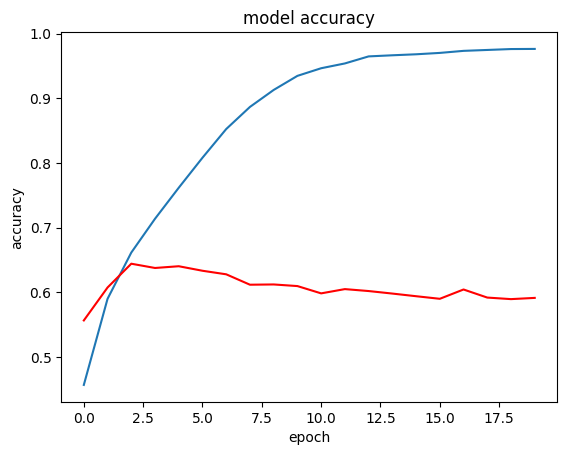

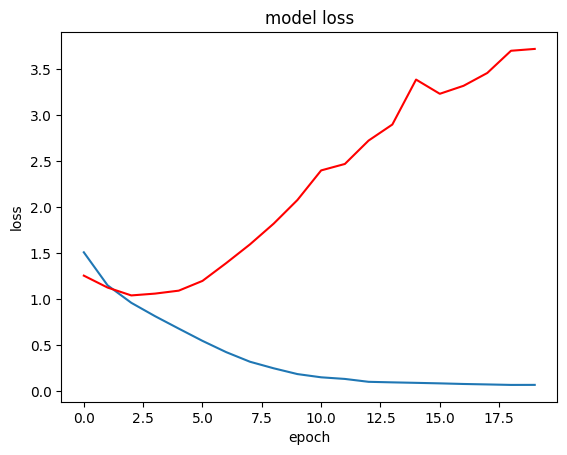

In [ ]:
# Visualization of training results
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Observamos que el comportamiento de la red es malo ya que está sobreajustando bastante.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


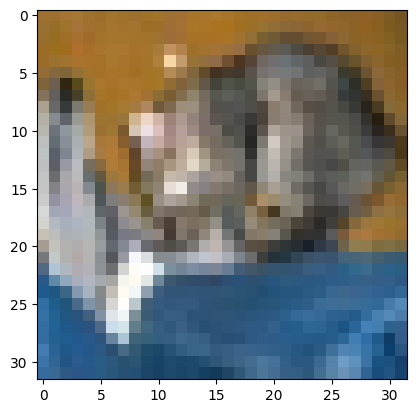

[1.8648576e-09 2.5111717e-18 1.0492574e-02 9.3481350e-01 1.1313469e-07
 5.4693818e-02 9.3712017e-12 1.3916409e-08 1.5993014e-09 6.1700471e-09]


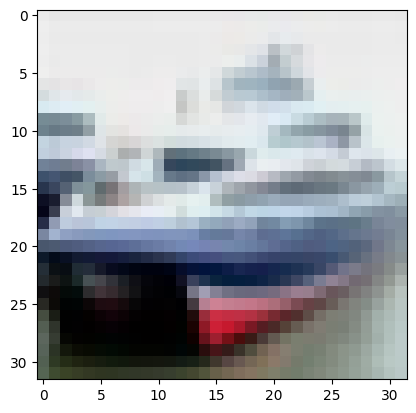

[1.6946323e-15 4.6908384e-17 1.5592022e-18 4.9952779e-24 4.9341978e-25
 6.1666122e-29 8.1005949e-31 1.4092258e-30 1.0000000e+00 7.0221183e-25]


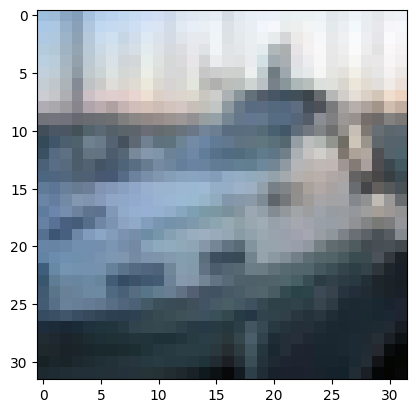

[9.9452424e-01 2.2478132e-06 7.2336115e-09 4.7336050e-13 4.2342367e-12
 1.6121728e-16 1.9819523e-19 6.6196865e-14 5.4735388e-03 5.6623797e-13]


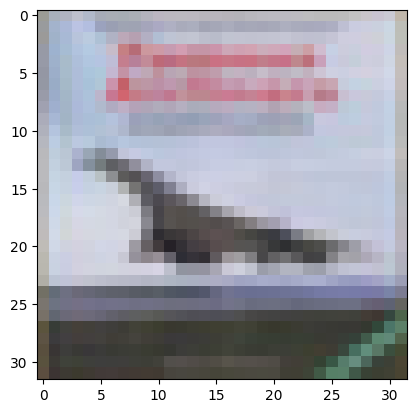

[9.9996126e-01 8.2059024e-08 6.0078429e-07 6.3962111e-09 7.5363239e-08
 3.5220629e-17 2.4733749e-06 5.3680860e-10 3.5353303e-05 5.0966868e-08]


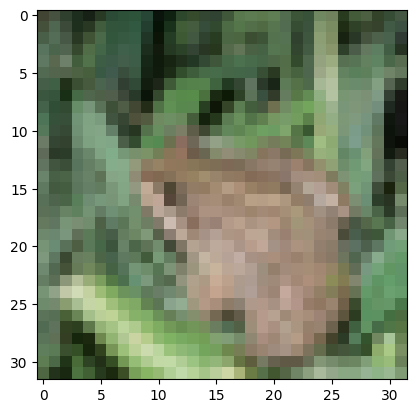

[1.9967075e-19 7.8654698e-20 9.9243200e-12 1.8772116e-15 1.4579961e-09
 5.9219091e-17 1.0000000e+00 1.8794806e-25 3.5025897e-21 9.8322959e-20]


In [12]:
# Visualization of some testing images

# Prediction for the first 10 images of test set
predictions = model.predict(test_samples[:5])

for i in range(0, 5):
  plt.figure()
  plt.imshow(test_images[i])
  plt.show()
  print( predictions[i] )

In [13]:
model.evaluate(test_samples, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5963 - loss: 3.6093


[3.7270255088806152, 0.5873000025749207]

A pesar de que sabemos que la red está sobreajustando, obtenemos un resultado mejor que empleando únicamente capas densas, esto puede deberse a que tenemos en cuenta la distribución espacial de los píxeles.

A continuación, vamos a tratar de evitar este sobreajuste empleando capas de MaxPooling.

# Capas convolucionales y maxPooling

Vamos a crear un modelo idéntico al anterior pero al que tras las capas convolucionales vamos a introducirle capas de MaxPooling.

Estas capas lo que hacen es reducir el muestreo de la entrada a lo largo de sus dimensiones espaciales (altura y anchura) tomando el valor máximo sobre una ventana de entrada (de tamaño definido por pool_size, en este caso 2x2) para cada canal de la entrada.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history=model.fit(
    train_samples,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.20
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,458 (376.79 KB)

 Trainable params: 96,458 (376.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3650 - loss: 1.7146 - val_accuracy: 0.5337 - val_loss: 1.2852
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5717 - loss: 1.1957 - val_accuracy: 0.6154 - val_loss: 1.0907
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6427 - loss: 1.0213 - val_accuracy: 0.6343 - val_loss: 1.0321
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6798 - loss: 0.9116 - val_accuracy: 0.6613 - val_loss: 0.9765
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6994 - loss: 0.8583 - val_accuracy: 0.6802 - val_loss: 0.9311
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7223 - loss: 0.7942 - val_accuracy: 0.6714 - val_loss: 0.9652
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7372 - loss: 0.7518 - val_accuracy: 0.6900 - val_loss: 0.8999
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7567 - loss: 0.6932 - 

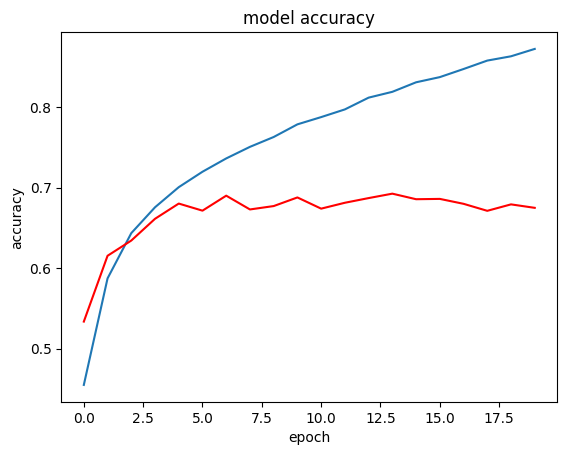

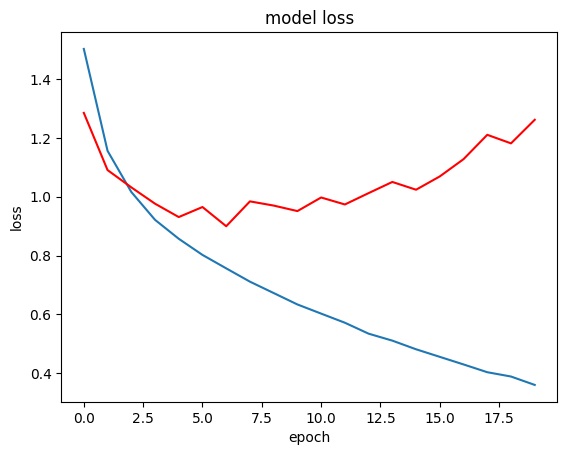

In [ ]:
# Visualization of training results
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Viendo estos resultados observamos que el modelo sigue sobreajustandose.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


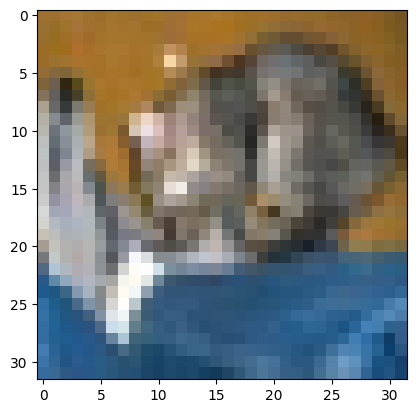

[1.4877330e-06 1.3777012e-09 9.4014977e-06 7.7483416e-01 2.3690867e-04
 2.2439468e-01 5.2260695e-04 6.7339738e-07 1.4159770e-08 5.9788853e-08]


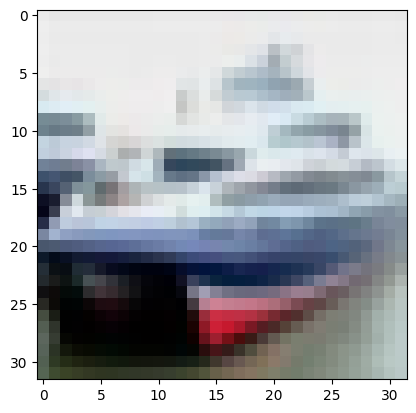

[1.5020504e-04 6.1266595e-03 8.5617472e-07 9.5761138e-08 1.0696863e-09
 3.9641140e-10 3.2145737e-11 7.4959934e-11 9.8988020e-01 3.8419464e-03]


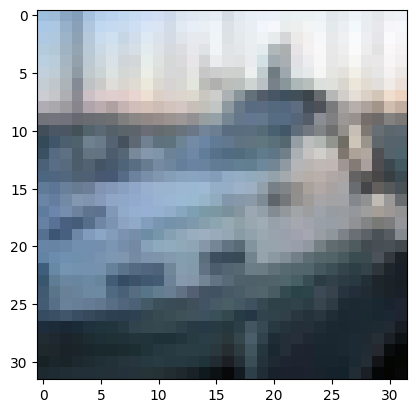

[6.0698502e-03 4.8096627e-02 3.7266789e-05 2.5190508e-03 1.1081898e-05
 2.1882041e-05 6.1784085e-06 1.4462892e-04 9.1500962e-01 2.8083744e-02]


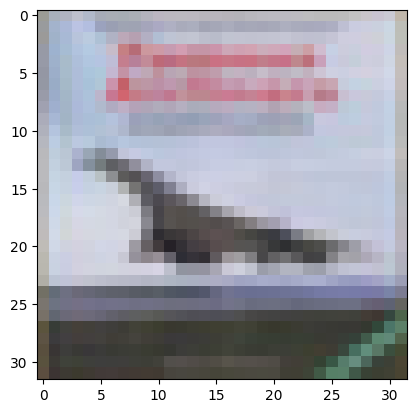

[7.9233325e-01 4.6556856e-06 1.8423770e-02 4.0351279e-06 3.7654006e-04
 1.5251858e-07 1.8366414e-07 1.0983028e-07 1.8881361e-01 4.3575350e-05]


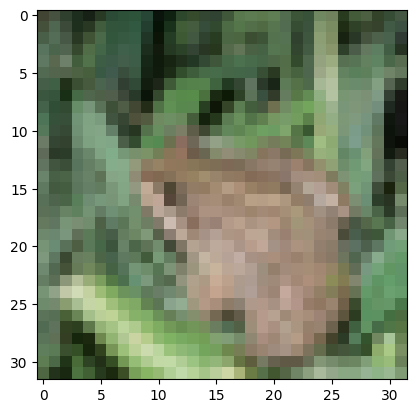

[4.4628515e-10 1.4351218e-09 4.3129171e-03 5.2579682e-02 5.0637847e-01
 8.7303389e-03 4.2799789e-01 6.4413399e-07 2.1100215e-09 2.5632593e-10]


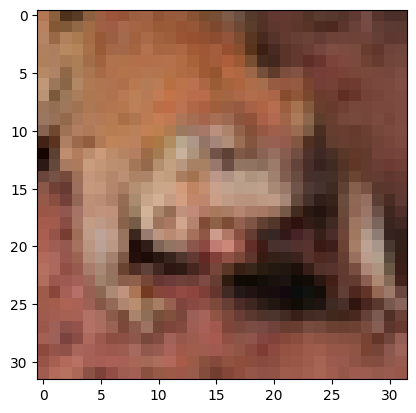

[3.02140402e-09 5.80318692e-12 4.86994453e-04 2.83013680e-04
 3.24271496e-05 8.03565417e-05 9.99117196e-01 2.82938579e-08
 3.17889404e-09 1.06546195e-10]


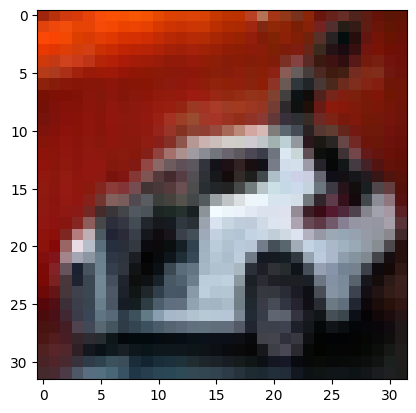

[3.9026080e-04 5.0263858e-01 2.3016203e-02 4.0437576e-01 1.2386762e-07
 2.6303470e-02 6.3753087e-04 7.1316265e-07 8.4021203e-06 4.2628985e-02]


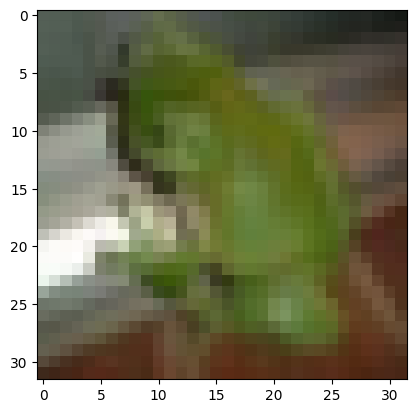

[1.2539751e-06 8.0629964e-10 1.9553998e-03 2.7564041e-02 7.6098913e-06
 7.6748627e-05 9.7039360e-01 5.2409863e-08 9.5697828e-07 5.0544480e-07]


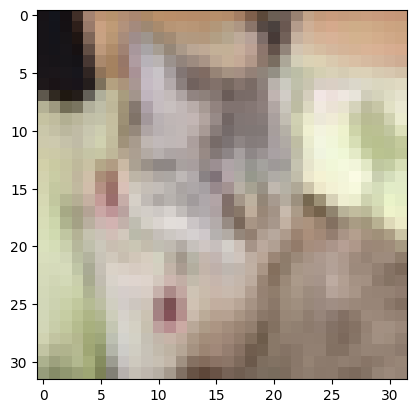

[8.2479027e-04 2.1347094e-07 4.0062892e-04 9.7078359e-01 1.0881627e-03
 2.5460115e-02 7.3286094e-04 7.0714328e-04 1.6727076e-07 2.2665374e-06]


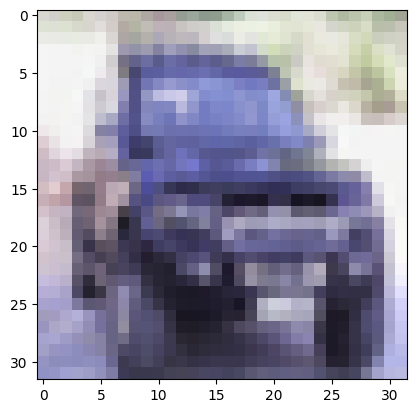

[4.1368199e-04 4.1528571e-01 3.2306256e-04 4.9276730e-07 1.1115564e-04
 8.5745955e-07 2.6276612e-05 1.4142027e-04 3.3018754e-03 5.8039546e-01]


In [15]:
# Visualization of some testing images

# Prediction for the first 10 images of test set
predictions = model.predict(test_samples[:10])

for i in range(0, 10):
  plt.figure()
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.show()
  print( predictions[i] )

In [17]:
model.evaluate(test_samples, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6741 - loss: 1.2485


[1.2801202535629272, 0.673799991607666]

A pesar de que el modelo sigue sobreajustandose, obtenemos mejores resultados. Obteniendo un 67% de accuracy en test.

Vamos a tratar de evitar el sobreajuste del entrenamiento empleando DropOut.

# Capas convolucionales, MaxPooling y DropOut

Finalmente vamos a tratar de eliminar el sobreajuste del entrenamiento introduciendo al modelo anterior capas DropOut tras las capas de MaxPooling.

La capa de dropout establece aleatoriamente las unidades de entrada en 0 con una frecuencia de velocidad en cada paso durante el tiempo de entrenamiento, lo que ayuda a prevenir el sobreajuste.

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history=model.fit(
    train_samples,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.20
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,458 (376.79 KB)

 Trainable params: 96,458 (376.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3494 - loss: 1.7868 - val_accuracy: 0.5373 - val_loss: 1.3044
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5469 - loss: 1.2753 - val_accuracy: 0.6126 - val_loss: 1.1140
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6072 - loss: 1.1059 - val_accuracy: 0.6432 - val_loss: 1.0275
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6426 - loss: 1.0183 - val_accuracy: 0.6682 - val_loss: 0.9616
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6633 - loss: 0.9582 - val_accuracy: 0.6788 - val_loss: 0.9246
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6818 - loss: 0.9080 - val_accuracy: 0.6829 - val_loss: 0.9074
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6920 - loss: 0.8792 - val_accuracy: 0.6856 - val_loss: 0.8908
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7049 - loss: 0.8342 - 

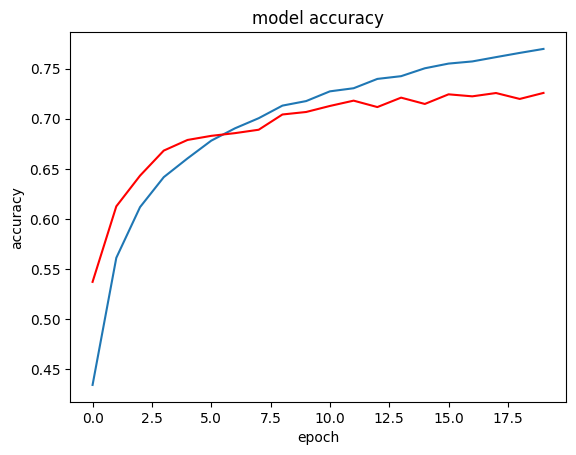

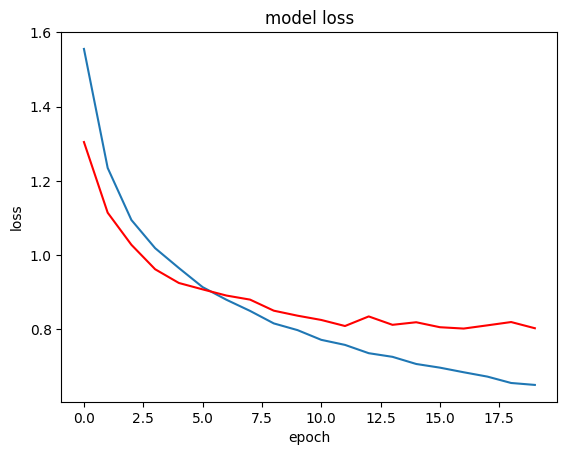

In [ ]:
# Visualization of training results
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Los resultados que obtenemos ahora, son mejores que los anteriores. En la gráfica del accuracy observamos que en el conjunto de entrenamiento se obtiene un accuracy alto y que sigue subiendo pero el conjunto de validación no se estanca, si no que sigue subiendo.

En el loss observamos un comportamiento similar en el que el conjunto de entrenamiento sigue disminuyendo pero en el conjunto de validación también.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


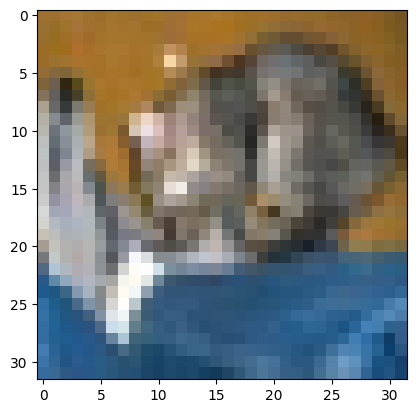

[6.3002114e-03 2.0650712e-04 1.0933606e-02 1.9302668e-01 6.4526368e-03
 4.2036572e-01 4.8906486e-02 3.6778641e-03 3.0770010e-01 2.4302208e-03]


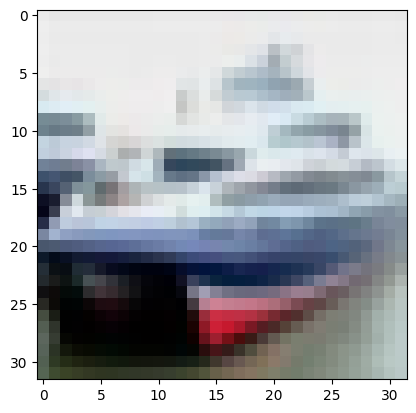

[4.7232551e-04 1.0000495e-02 4.9897810e-08 2.3037655e-06 4.8695004e-08
 1.2519712e-07 3.1062491e-08 2.0001051e-08 9.8755533e-01 1.9693100e-03]


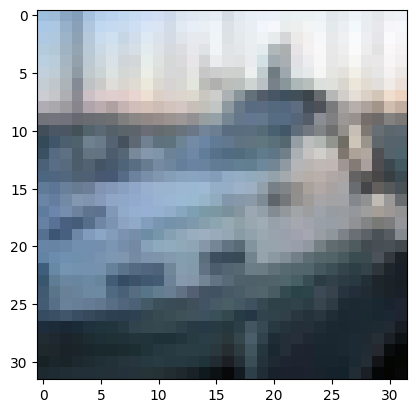

[6.7607827e-02 6.0180575e-01 9.7493734e-04 3.1737666e-04 5.6026055e-04
 2.2371963e-04 3.1410510e-04 1.2524037e-04 2.8971443e-01 3.8356218e-02]


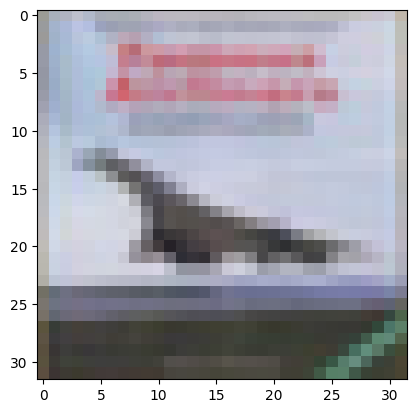

[7.84691453e-01 1.66750338e-03 4.44684178e-02 1.35476915e-02
 1.27016619e-01 6.21731102e-04 1.04152532e-05 3.93545197e-04
 2.73392890e-02 2.43351984e-04]


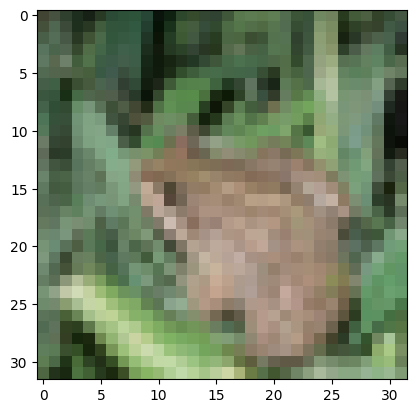

[7.88054385e-05 1.03385919e-05 1.60677489e-02 5.52632958e-02
 1.00362934e-01 7.29099906e-04 8.27470481e-01 1.20577952e-05
 3.81085647e-06 1.37441100e-06]


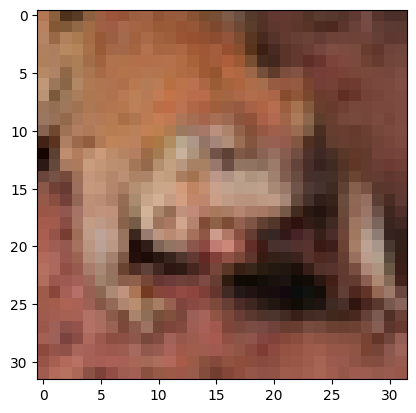

[3.6346093e-05 1.2790720e-05 3.4351151e-03 1.0858565e-02 9.8431865e-03
 7.9257665e-03 9.6745068e-01 3.7123536e-04 1.2068263e-05 5.4218413e-05]


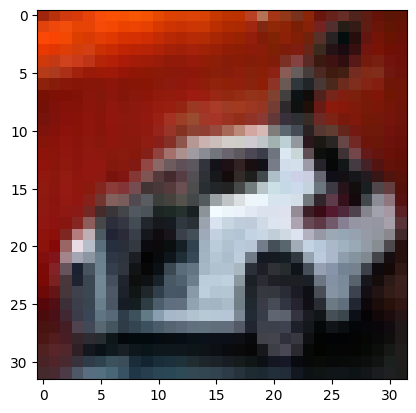

[0.11704905 0.23738307 0.10283382 0.08038933 0.00167359 0.03688237
 0.00617906 0.01131489 0.0063798  0.39991498]


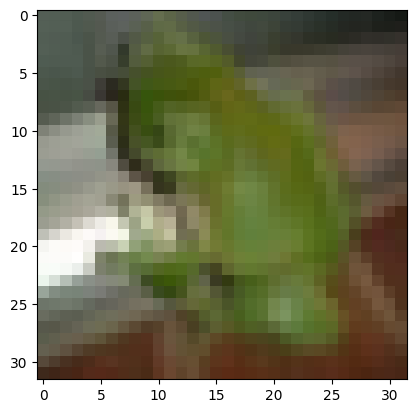

[4.87711839e-03 7.78362955e-05 4.42620888e-02 6.91465065e-02
 1.33099183e-01 2.34413985e-03 7.45752692e-01 1.07245294e-04
 2.62460730e-04 7.07254512e-05]


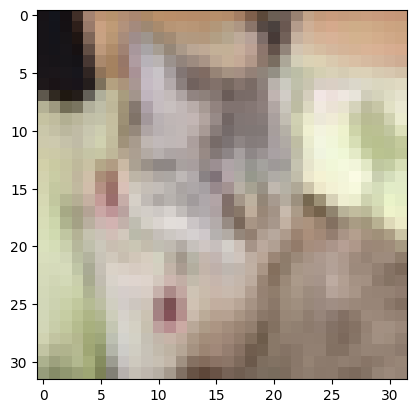

[2.9872693e-04 2.9489443e-05 3.8388669e-02 7.7783906e-01 6.9620132e-02
 8.8821694e-02 2.0257464e-02 4.6629747e-03 6.7438918e-06 7.4992618e-05]


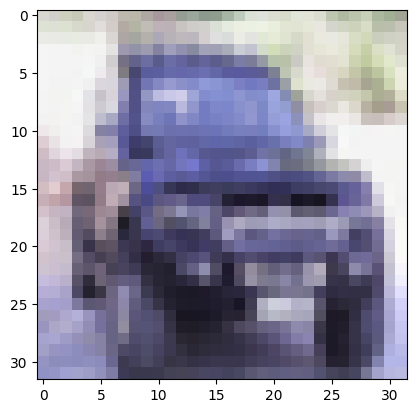

[4.9253493e-03 8.2359260e-01 1.8291673e-04 1.0807022e-04 3.2166339e-04
 6.2162217e-05 1.5583794e-04 8.5587570e-05 6.8606674e-03 1.6370510e-01]


In [20]:
# Visualization of some testing images

# Prediction for the first 10 images of test set
predictions = model.predict(test_samples[:10])

for i in range(0, 10):
  plt.figure()
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.show()
  print( predictions[i] )

In [21]:
model.evaluate(test_samples, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7241 - loss: 0.8153


[0.8223093748092651, 0.7214000225067139]

Obtenemos el mejor resultado, con un modelo sin sobreajuste y obteniendo un 72% de accuracy en el conjunto de test.

Creemos que si empleasemos más epochs podríamos obtener un mejor modelo, pero consideramos que mediante esta arquitectura obtenemos un buen modelo.